In [3]:
import pickle

with open('../data/TweetsMG_LogisticRegression_AS.pkl', 'rb') as f:
    model = pickle.load(f)

with open('../data/TweetsMG_text_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [4]:
import pandas as pd
from data_preprocessing import clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
file = 'comentario_vacina'
df =  pd.read_csv(f'../data/{file}.csv')
df.head()

,fk_id,comentario,site
0,3652,"O\nex-ministro da Saúde, Luiz Henrique Mandett...",G1
1,3652,Ainda vai demorar demais pra chegar a vacina.....,G1
2,3652,"E a cloroquina, os milhões investido, foram pr...",G1
3,3652,"CARISSIMO SR THIAGO LUZ , TENHO VARIOS AMIGOS ...",G1
4,3652,Ué.... ea cloroquina milagrosa defendida pelo ...,G1


In [15]:
# preprocessamento
text = 'comentario'
df['preprocessed_text'] = df[text].apply(lambda x: clean_text(x))

# vetorização do texto
df_vectorize = vectorizer.transform(df['preprocessed_text'].values.tolist())

In [16]:
df['resultado'] = model.predict(df_vectorize)

# teste salvar o vectorize e o modelo do outro notebook e usar aqui

In [17]:
dic_classificacao = {
    0 : 'Neutro',
    2 : 'Negativo',
    1: 'Positivo',
}
df['resultado'] = df['resultado'].replace(dic_classificacao)

In [40]:
df[['resultado', 'tweet']].query("resultado == 'Negativo'")['tweet']

22      'Alegria de fazer parte desse momento', diz mé...
159     RT @sbtnews: Bolsonaro cobrou ainda que labora...
193     Governo do RJ diz ter estoque de 8 milhões de ...
242     'É uma imoralidade que pessoas com dinheiro te...
296     Brasil chega a 200 mil mortes por Covid-19 sem...
405     Anvisa autoriza importação de vacina de Oxford...
407     RT @sbtnews: No domingo, a diretoria da Anvisa...
474     RT @sbtnews: A pesquisa britânica revela ainda...
475     A pesquisa britânica revela ainda que a imunid...
499     RT @sbtnews: O presidente se reuniu com o emba...
514     O presidente se reuniu com o embaixador indian...
858     RT @ze_marques: Em agosto, o governador de MG,...
972     RT @patricia_vasc: Nevasca suspende aplicação ...
973     Mais de 2,2 milhões de pessoas já receberam do...
978     RT @sbtnews: URGENTE - Chega ao Brasil o avião...
1000    Pedido de registro definitivo da CoronaVac dev...
1007    RT @JoanaCunhaO: É uma tendência?\n\nPainel S....
1116    Como a

In [47]:
import matplotlib.pyplot as plt

## Resultado usando Tweets_MG como treino

In [41]:
df = pd.read_csv('../data/previsoes/comentario_vacina_predict.csv')

In [44]:
x = df['sentimento']
y = df['sentimento'].values

,index,resultado
0,Neutro,794
1,Positivo,440
2,Negativo,20


<BarContainer object of 3 artists>

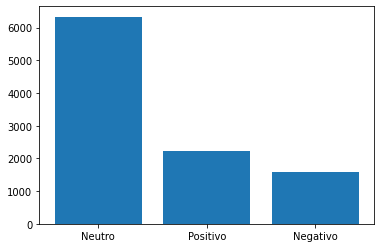

In [48]:
df_resultado = pd.DataFrame(df['sentimento'].value_counts()).reset_index()
plt.bar(df_resultado['index'], df_resultado['sentimento'])